# Let's read in our data and take a look at which variables we have.


In [3]:
from netCDF4 import Dataset
import matplotlib.dates as mdates

try: ncfile.close()
except: print("it wasn't open"); pass

ncfile = Dataset('../tests/test_data/test_mod_dir/test_append.nc', mode='r+')
f = ncfile.groups['geotop'] # Pick model group
print(f.variables.keys())

dict_keys(['soil_depth', 'Date', 'simulation', 'pointid', 'sitename', 'model', 'Tg'])


# Now pull out variables & explore their dimensions and shape.

In [28]:
temp = f['Tg']
time = f['Date']

print('The temperature variable shape: %s and dimensions: %s' % (temp.shape, temp.dimensions))
print('The time variable shape: %s and dimensions: %s' % (time.shape, time.dimensions))

The temperature variable shape: (12, 280504, 5) and dimensions: ('simulation', 'time', 'soil_depth')
The time variable shape: (280504,) and dimensions: ('time',)


# Right now temp and time are _variables_ If we want to actually access this data, we use "[]":

In [29]:
print("Temp data looks like: %s (Units: %s)" % (temp[0,0,0], temp.units)) # Simulation_index = 0, depth_index = 0
print('Our time data is from %s to %s' % (time[0], time[-1]))

Temp data looks like: -26.921635 (Units: degree_Celcius)
Our time data is from 726469.0833333334 to 738156.7083333334


# What is the time extent of our data? How can we reformat this ugly bs?

In [30]:
from netCDF4 import num2date

start, end = [date.strftime('%Y-%m-%d %H:%M:%S') for date in num2date(time[:2], time.units)]
print('Or, in other words: %s to %s' % (start, end))

Or, in other words: 1990-01-01 02:00:00 to 1990-01-01 03:00:00


# How can I plot this? Let's say, temperature at 0.1m depth in 1991.

First, we have to pick out our desired time extent.

In [31]:
from datetime import datetime
import numpy as np

year = 1991
#mdates.set_epoch('0001-01-01T00:00')
print(mdates.get_epoch())
#if mdates.get_epoch() != '0001-01-01T00:00': mdates.set_epoch('0001-01-01T00:00')

1970-01-01T00:00:00


# Nice! Now, time to plot 1991 temp data.

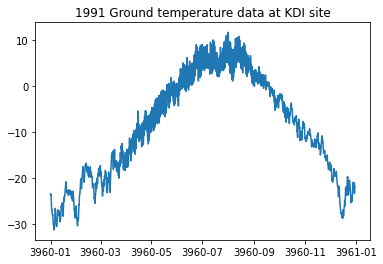

In [32]:
import matplotlib.pyplot as plt

start = (datetime(year, 1, 1, 0, 0, 0) - datetime(1, 1, 1, 0, 0, 0)).total_seconds() / 86400
end = (datetime(year, 12, 31, 23, 0, 0) - datetime(1, 1, 1, 0, 0, 0)).total_seconds() / 86400
time_select = np.logical_and(time[:] > start, time[:] < end)

data = temp[0, time_select, 0] # data = temp[simulation_index, time_select, depth_index]
plt.title("%s Ground temperature data at KDI site" % year)
plt.plot(mdates.num2date(time[time_select]), data[:])
plt.show()

What if we want to add a new variable to our dataset?
open a new dataset

In [33]:
# .nc file has groups of simulations -> each group has data for each site
# geotop_merra: site1, site2, site3
# geotop_jra: site1, site2, site3
# geotop_erai: site1, site2, site3
# acco: site1, site2, site3

acco = ncfile['acco']
if 'nchars' not in acco.dimensions.keys():
    acco.createDimension('nchars', f.dimensions['nchars'].size)

if 'simulation' not in acco.dimensions.keys():
    acco.createDimension('simulation', f.dimensions['simulation'].size)

if 'simulation' not in acco.variables.keys():
    acco.createVariable('simulation', f.variables['simulation'].datatype, f.variables['simulation'].dimensions)
    acco.variables['simulation'] = f.variables['simulation']

if 'time' not in acco.dimensions.keys():
    acco.createDimension('time', f.dimensions['time'].size)

if 'Date' not in acco.variables.keys():
    acco.createVariable('Date', f.variables['Date'].datatype, f.variables['Date'].dimensions)
    acco.variables['Date'] = f.variables['Date']

IndexError: acco not found in /

In [26]:
ncfile.close()